In [563]:
import matplotlib.pyplot as plt
import pandas as pd

In [564]:
df_np_mem = pd.concat([#pd.read_csv("../../../../results/nopass_mem_reduced.csv"),
                       #pd.read_csv("../../../../results/nopass_mem.csv"),
                       pd.read_csv("../../../../results/nopass_mem_optimized.csv")])

df_p_mem = pd.concat([ #pd.read_csv("../../../../results/pass_mem_reduced.csv"),
                       #pd.read_csv("../../../../results/pass_mem.csv"),
                       pd.read_csv("../../../../results/pass_mem_optimized.csv")])

df_np_reg = pd.concat([#pd.read_csv("../../../../results/nopass_reg.csv"),
                       pd.read_csv("../../../../results/nopass_reg_optimized.csv")])

df_p_reg = pd.concat([ #pd.read_csv("../../../../results/pass_reg.csv"),
                       pd.read_csv("../../../../results/pass_reg_optimized.csv")])

In [565]:
df_np_reg_errcodes = df_np_reg.groupby('code').size()
df_p_reg_errcodes = df_p_reg.groupby('code').size()
df_np_mem_errcodes = df_np_mem.groupby('code').size()
df_p_mem_errcodes = df_p_mem.groupby('code').size()

In [566]:
for err_code in df_p_reg_errcodes.keys():
    if not err_code in df_np_reg_errcodes:
        df_np_reg_errcodes[err_code] = 0
    if not err_code in df_np_mem_errcodes:
        df_np_mem_errcodes[err_code] = 0

In [567]:
tot_np_mem_errcodes = df_np_mem_errcodes.sum()
tot_p_mem_errcodes = df_p_mem_errcodes.sum()
tot_np_reg_errcodes = df_np_reg_errcodes.sum()
tot_p_reg_errcodes = df_p_reg_errcodes.sum()

In [568]:
dict_results = dict()
dict_results['code'] = []
dict_results['faults_reg_nopass'] = []
dict_results['faults_reg_pass'] = []
dict_results['faults_mem_nopass'] = []
dict_results["faults_mem_pass"] = []

print("Code\t Registers no pass\t Registers\t\t Improv.\t Memory no pass\t\t Memory\t\t\t Improv.")
for err_code in df_np_reg_errcodes.keys():
    dict_results['code'].append(err_code)
    dict_results['faults_reg_nopass'].append(df_np_reg_errcodes[err_code])
    dict_results['faults_reg_pass'].append(df_p_reg_errcodes[err_code])
    dict_results["faults_mem_nopass"].append(df_np_mem_errcodes[err_code])
    dict_results["faults_mem_pass"].append(df_p_mem_errcodes[err_code])
    print(err_code, "\t", 
        df_np_reg_errcodes[err_code], "\t", '(%.3f'%(df_np_reg_errcodes[err_code]/tot_np_reg_errcodes * 100)+"%)", 
        "\t", 
        df_p_reg_errcodes[err_code], "\t", '(%.3f'%(df_p_reg_errcodes[err_code]/tot_p_reg_errcodes * 100)+"%)",
        "\t",
        '%.3f'%((df_np_reg_errcodes[err_code]/tot_np_reg_errcodes)/(df_p_reg_errcodes[err_code]/tot_p_reg_errcodes))+"x",
        "\t",
        df_np_mem_errcodes[err_code], "\t", '(%.3f'%(df_np_mem_errcodes[err_code]/tot_np_mem_errcodes * 100)+"%)",
        "\t", 
        df_p_mem_errcodes[err_code], "\t", '(%.3f'%(df_p_mem_errcodes[err_code]/tot_p_mem_errcodes * 100)+"%)",
        "\t",
        '%.3f'%((df_np_mem_errcodes[err_code]/tot_np_mem_errcodes)/(df_p_mem_errcodes[err_code]/tot_p_mem_errcodes))+"x",)

Code	 Registers no pass	 Registers		 Improv.	 Memory no pass		 Memory			 Improv.
-3 	 290 	 (2.419%) 	 141 	 (1.082%) 	 2.235x 	 39 	 (0.327%) 	 21 	 (0.163%) 	 2.010x
-2 	 117 	 (0.976%) 	 9 	 (0.069%) 	 14.126x 	 46 	 (0.385%) 	 10 	 (0.077%) 	 4.979x
-1 	 806 	 (6.723%) 	 525 	 (4.030%) 	 1.668x 	 295 	 (2.472%) 	 166 	 (1.285%) 	 1.923x
0 	 10775 	 (89.882%) 	 11090 	 (85.137%) 	 1.056x 	 11553 	 (96.816%) 	 12629 	 (97.786%) 	 0.990x
1 	 0 	 (0.000%) 	 595 	 (4.568%) 	 0.000x 	 0 	 (0.000%) 	 51 	 (0.395%) 	 0.000x
2 	 0 	 (0.000%) 	 666 	 (5.113%) 	 0.000x 	 0 	 (0.000%) 	 38 	 (0.294%) 	 0.000x


In [569]:
df = pd.DataFrame.from_dict(dict_results)
df['percent_faults_reg_nopass'] = df['faults_reg_nopass']/tot_np_reg_errcodes
df['percent_faults_reg_pass'] = df['faults_reg_pass']/tot_p_reg_errcodes
df['percent_faults_mem_nopass'] = df['faults_mem_nopass']/tot_np_mem_errcodes
df['percent_faults_mem_pass'] = df['faults_mem_pass']/tot_p_mem_errcodes

In [570]:
df["improv_reg"] = df['percent_faults_reg_nopass'] / df['percent_faults_reg_pass']
df["improv_mem"] = df['percent_faults_mem_nopass'] / df['percent_faults_mem_pass']
df["Type"] = pd.Series(['Loop', 'SDC', 'Detected (HW)', 'No effect', 'Detected (EDDI)', 'Detected (CFCSS)'])

df = df.set_index("code")

In [571]:
df

,faults_reg_nopass,faults_reg_pass,faults_mem_nopass,faults_mem_pass,percent_faults_reg_nopass,percent_faults_reg_pass,percent_faults_mem_nopass,percent_faults_mem_pass,improv_reg,improv_mem,Type
code,,,,,,,,,,,
-3,290,141,39,21,0.024191,0.010825,0.003268,0.001626,2.234823,2.009972,Loop
-2,117,9,46,10,0.009760,0.000691,0.003855,0.000774,14.125626,4.978547,SDC
-1,806,525,295,166,0.067234,0.040304,0.024721,0.012853,1.668169,1.923352,No effect
0,10775,11090,11553,12629,0.898815,0.851374,0.968156,0.977855,1.055723,0.990081,Detected (HW)
1,0,595,0,51,0.000000,0.045678,0.000000,0.003949,0.000000,0.000000,Detected (EDDI)
2,0,666,0,38,0.000000,0.051129,0.000000,0.002942,0.000000,0.000000,Detected (CFCSS)


<AxesSubplot: title={'center': 'Percentage of faults in registers with and without protection'}, xlabel='Type'>

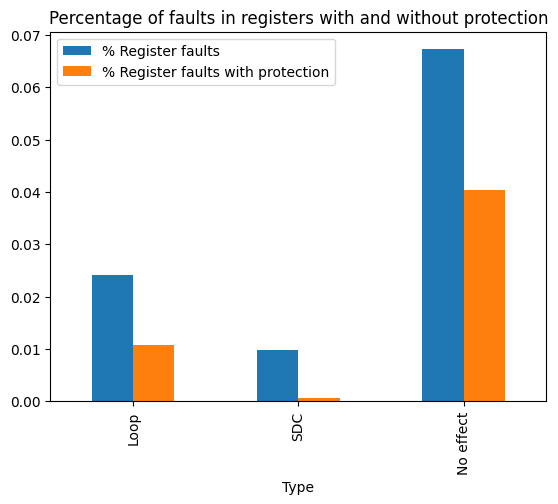

In [572]:
plt = df.drop([0,1,2]).plot(x="Type", y=["percent_faults_reg_nopass", "percent_faults_reg_pass"], kind="bar")
plt.legend(["% Register faults", "% Register faults with protection"])
plt.set_title("Percentage of faults in registers with and without protection")
plt

<AxesSubplot: title={'center': 'Percentage of faults in memory with and without protection'}, xlabel='Type'>

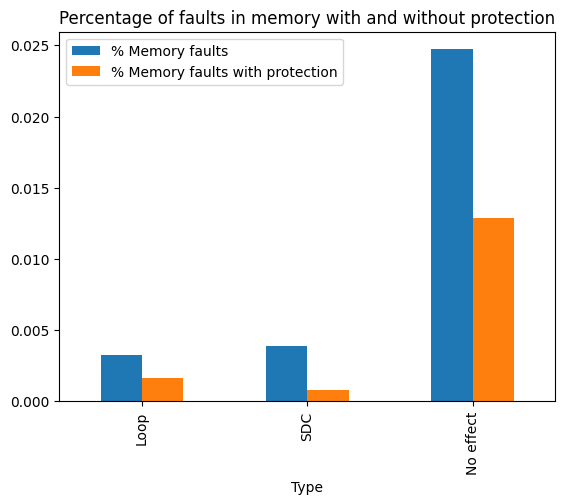

In [573]:
plt = df.drop([0,1,2]).plot(x="Type", y=["percent_faults_mem_nopass", "percent_faults_mem_pass"], kind="bar")
plt.legend(["% Memory faults", "% Memory faults with protection"])
plt.set_title("Percentage of faults in memory with and without protection")
plt